<a href="https://colab.research.google.com/github/CPTR295/ML1/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,as_frame=False)

X_train = mnist['data'][:60000]
X_test=mnist['data'][60000:]
y_train=mnist['target'][:60000]
y_test=mnist['target'][60000:]

In [6]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)


In [8]:
import time
t0=time.time()
rnd_clf.fit(X_train,y_train)
t1=time.time()

In [9]:
print("Training Time {:.2f}s".format(t1-t0))

Training Time 83.92s


In [10]:
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.9705

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_reduced=pca.fit_transform(X_train)

In [13]:
rnd_clf2=RandomForestClassifier(n_estimators=100,random_state=42)
t0=time.time()
rnd_clf2.fit(X_train_reduced,y_train)
t1=time.time()

In [14]:
print('Training Time {:.2f}s'.format(t1-t0)) #For this datasets-model comba PCA didnt work

Training Time 251.46s


In [16]:
X_test_reduced=pca.transform(X_test)
y_pred=rnd_clf2.predict(X_test_reduced)
accuracy_score(y_pred,y_test)

0.9488

In [17]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs",random_state=42)
t0=time.time()
log_clf.fit(X_train,y_train)
t1=time.time()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print('Training Time {:.2f}s'.format(t1-t0))

Training Time 90.60s


In [21]:
y_pred=log_clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.9255

In [22]:
log_clf2=LogisticRegression(multi_class="multinomial",solver="lbfgs",random_state=42)
t0=time.time()
log_clf2.fit(X_train_reduced,y_train)
t1=time.time()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
print("Training Time {:.2f}.s".format(t1-t0))

Training Time 23.98.s


In [24]:
y_pred=log_clf2.predict(X_test_reduced)
accuracy_score(y_pred,y_test)

0.9201

In [32]:
import numpy as np

m = 10000
idx = np.random.permutation(60000)[:m]

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42)
X=mnist['data'][idx]
X_reduced=tsne.fit_transform(X)

In [36]:
y = mnist['target'][idx]

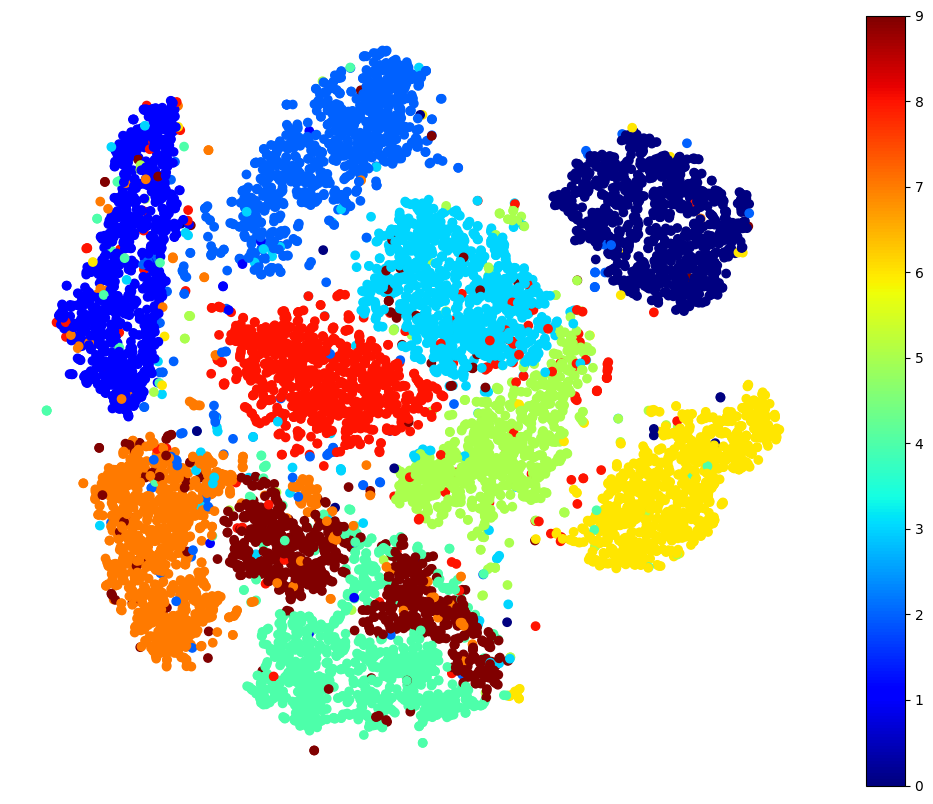

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
y_plot = np.asarray(y, dtype=int)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_plot, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()